# Building a CNN

## 1. Building the CNN

In [1]:
import os

In [2]:
data_path = '/home/raul/Udemy/deep_learning/cnn'

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Initilize the neural network

In [11]:
classifier = Sequential()

Add layers

**Tip**:
* input_shape: If TensorFlow backend, channel last. If Theano, chanel first

Configure the CNN

In [12]:
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), 
                             input_shape=(64, 64, 3), 
                             activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation="relu"))
classifier.add(Dense(units = 1, activation="sigmoid"))
classifier.compile(optimizer = "adam", 
                   loss = "binary_crossentropy", 
                   metrics=["accuracy"])

## 2. Fitting the CNN to the images

https://keras.io/preprocessing/image/

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_path = os.path.join(data_path, 'dataset', 'training_set')
test_data_path = os.path.join(data_path, 'dataset', 'test_set')

train_set = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
# steps_per_epoch --> number of training images (8000)
# validation_steps --> number of test images (2000)

classifier.fit_generator(
        train_set,
        steps_per_epoch=800,
        epochs=1,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/1
800/800 [==============================] - 161s - loss: 0.5913 - acc: 0.6862 - val_loss: 0.5375 - val_acc: 0.7423


## 3. Tunning the CNN

We add a second convolutional neural network

In [14]:
classifier_2 = Sequential()
classifier_2.add(Convolution2D(filters=32, kernel_size=(3,3), 
                             input_shape=(64, 64, 3), 
                             activation="relu"))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
classifier_2.add(Convolution2D(filters=32, kernel_size=(3,3), 
                             activation="relu"))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
classifier_2.add(Flatten())
classifier_2.add(Dense(units = 128, activation="relu"))
classifier_2.add(Dense(units = 1, activation="sigmoid"))
classifier_2.compile(optimizer = "adam", 
                   loss = "binary_crossentropy", 
                   metrics=["accuracy"])

In [15]:
# steps_per_epoch --> number of training images (8000)
# validation_steps --> number of test images (2000)

classifier_2.fit_generator(
        train_set,
        steps_per_epoch=800,
        epochs=1,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/1
800/800 [==============================] - 201s - loss: 0.5802 - acc: 0.6824 - val_loss: 0.5270 - val_acc: 0.7461


## 4. Make New Prediction

In [48]:
import numpy as np
from keras.preprocessing import image

In [49]:
image_path_1 = os.path.join(data_path, 'dataset', 
                            'single_prediction', 
                            'cat_or_dog_2.jpg')

test_image = image.load_img(image_path_1, target_size=(64, 64))

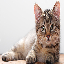

In [50]:
test_image

In [51]:
print(test_image)

<PIL.Image.Image image mode=RGB size=64x64 at 0x7F60AA67BD30>


In [52]:
test_image = image.img_to_array(test_image)

In [53]:
print(test_image.shape)

(64, 64, 3)


In [54]:
test_image = np.expand_dims(test_image, axis=0)

In [55]:
print(test_image.shape)

(1, 64, 64, 3)


In [56]:
result = classifier.predict(test_image)

In [57]:
result

array([[ 0.]], dtype=float32)

In [58]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [59]:
if result[0][0] == 1:
    prediction = "dog"
else:
    prediction = "cat"

In [60]:
print("Prediction: {0}".format(prediction))

Prediction: cat
